In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
%matplotlib inline


<strong> Problem 1 </strong>: 5pts, 38.1.  Note in the function header 

`HenonMap(x, y, a, b, alpha, beta)`

it should be 

`HenonMap(x, y, a, b, alpha, gamma)`

And ignore the bit about starting from `(0,0)` until the next problem.  

In [5]:
def HenonMap(pt, a, b, alpha, gamma):
    x = pt[0]
    y = pt[1]
    xn1 = a - alpha*x**2 + b*y
    yn1 = gamma*x
    return np.array([xn1,yn1])

<strong> Problem 2 </strong>: 5pts, 38.2.  But instead of what the book tells you to do, use a function header of the form

`def HenonIterate(x0,y0,a,b,alpha,gamma,n):`

because that, at least to me, makes a lot more sense.  

In [27]:
def HenonIterate_Plot(x0,y0,a,b,alpha,gamma,n):
    iterates = np.zeros([n,2])
    iterates[0,0] = x0
    iterates[0,1] = y0
    for jj in range(1,n):
        iterates[jj,:] = HenonMap(iterates[jj-1,:],a,b,alpha,gamma)
        
    return iterates
   

<strong> Problem 3 </strong>: 5pts, 38.3.  

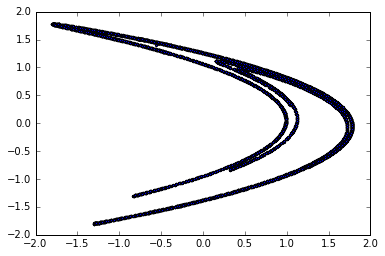

In [29]:
x0 = 0.
y0 = 0.
a = 1.4
b = .3
alpha = 1.
gamma = 1.
n = 10000
iterates = HenonIterate_Plot(x0,y0,a,b,alpha,gamma,n)
plt.scatter(iterates[2:,0],iterates[2:,1],s=5)

<strong> Problem 4 </strong>: 5pts, 37.4.  As with the Mandelbrot set we discussed in class, in order to see the Henon Whirlwind, the idea here is the following.  The Hennon map, given an initial condition $(x_{0},y_{0})$, generates a sequence of points in the plane, say $(x_{n},y_{n})$ via the formula given in Exercise 1 of Chapter 38 of the textbook.  

The question is, for a given value $R$ representing the radius of a circle around the origin, at what value of $n$ do we have 

$$
\sqrt{x_{n}^{2} + y_{n}^{2}} > R
$$

When we know that value of $n$, we store it, and then plot that value over the real plane $\mathbb{R}^{2}$.  So the question we are addressing is whether for a given initial condition $(x_{0},y_{0})$ we stay in a bounded region, i.e. if we stay inside a circle of radius $R$, or if we leave this circle.  What we plot is how many iterations it takes to leave the circle, though in some cases, it will be the case that you never leave.

Thus, a rough sketch of the algorithm you will need to implement is the following

<ol>
<li> Generate new initial condition $(x_{0},y_{0})$ where $x_{0}\in[Xmin,Xmax]$, $y_{0}\in[Ymin,Ymax]$.
<li> Keep iterating the Henon map on this initial condition to generate $(x_{n},y_{n})$.  Stop if either $\sqrt{x_{n}^{2}+y_{n}^{2}}> R$ or $n=Niter$.
<li> Store the value of $n$
<li> Plot the values of $n$ over the box $[Xmin,Xmax]\times[Ymin,Ymax]$.
</ol>

Note, to get the desired effect, you should use the parameter values

`
a = 1.
b = 1.
alpha = .2
gamma = 1.3
Rad = 100
Niter = 100
Nvals = 200
Xmin = -5
Xmax = 5
Ymin = -5
Ymax = 5`

If you are feeling ambitious, try small changes in the value of `gamma` and see what happens.  

In [57]:
def Henon_Escape(gamma,Xmin,Xmax,Ymin,Ymax,Rad,Niter,Nvals):
    
    # Xmin - Lower bound of real axis we take values of c from
    # Xmax - Upper bound of real axis we take values of c from
    # Ymin - Lower bound of imaginary axis we take values of c from
    # Ymax - Upper bound of imaginary axis we take values of c from
    # Rad - Radius of the complex disc which defines our bounded region
    # Niter - Maximum number of iterations
    # Nvals - Number of points along the real and imaginary axis we use to study different values of c
    
    a = 1.
    b = 1.
    alpha = .2
    
    Xaxis = np.linspace(Xmin,Xmax,Nvals)
    Yaxis = np.linspace(Ymin,Ymax,Nvals)
    
    iter_cnt = np.zeros([Nvals,Nvals])
    
    for jj in range(Nvals):
        for kk in range(Nvals):
            pt0 = np.array([Xaxis[jj],Yaxis[kk]]) # Generate a new initial value using the arrays Xaxis and Yaxis
            n = 0
           
            while n < Niter:
                pt0 = HenonMap(pt0, a, b, alpha, gamma)
                n += 1
                if(np.sqrt((pt0[0])**2. + (pt0[1])**2.)>Rad): break                
                
            iter_cnt[jj,kk] = n

    # This is a bunch of plotting stuff.  If you don't learn it, that is fine.                      
    dpi = 72
    width = 10
    height = 10
    img_width = dpi * width
    img_height = dpi * height
    
    fig, ax = plt.subplots(figsize=(width, height),dpi=72)
    ticks = np.arange(0,img_width,3*dpi)
    x_ticks = Xmin + (Xmax-Xmin)*ticks/img_width
    plt.xticks(ticks, x_ticks)
    y_ticks = Ymin + (Ymax-Ymin)*ticks/img_width
    plt.yticks(ticks, y_ticks)
    
    ax.imshow(iter_cnt.T,origin='lower') 

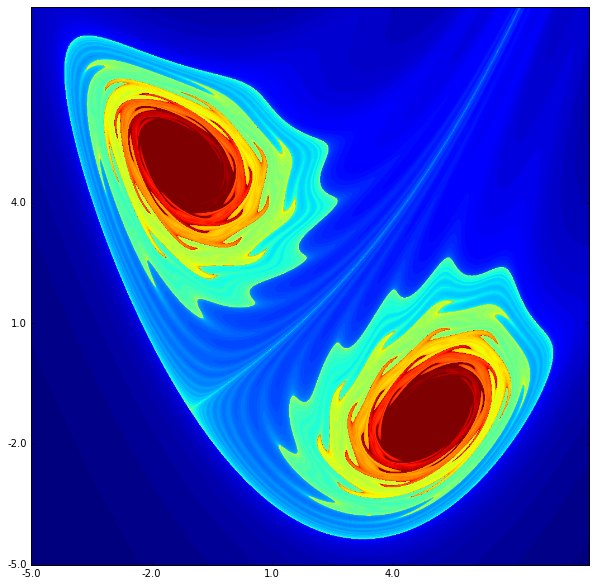

In [59]:
Henon_Escape(1.03,-5.,5.,-5.,5.,100.,100,1000)